In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("car-mpg.csv")

In [3]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [4]:
#Drop car name - since this has not effect on the dependent variable that is mielage per gallon (mpg)
#Replace origin into 1,2,3 .. do not forget to get_dummies
#Replace ? with NaN
#Replace all nan with median


data = data.drop(["car_name"], axis = 1)
data["origin"] = data["origin"].replace({1: "america", 2 : "europe", 3 : "asia"})
data = pd.get_dummies(data, columns=["origin"])
data = data.replace("?", np.nan)
# data = data.apply(lambda x: x.fillna(x.median()), axis = 0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              392 non-null    object 
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   car_type        398 non-null    int64  
 8   origin_america  398 non-null    bool   
 9   origin_asia     398 non-null    bool   
 10  origin_europe   398 non-null    bool   
dtypes: bool(3), float64(3), int64(4), object(1)
memory usage: 26.2+ KB


In [6]:
data.isna().sum()


mpg               0
cyl               0
disp              0
hp                6
wt                0
acc               0
yr                0
car_type          0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [7]:
data.hp = pd.to_numeric(data.hp)
data.hp = data.hp.fillna(data.hp.median())

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              398 non-null    float64
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   car_type        398 non-null    int64  
 8   origin_america  398 non-null    bool   
 9   origin_asia     398 non-null    bool   
 10  origin_europe   398 non-null    bool   
dtypes: bool(3), float64(4), int64(4)
memory usage: 26.2 KB


In [9]:
X = data.drop(["mpg"], axis = 1) #independent variable
Y = data[["mpg"]] #dependent variable

In [10]:
#Scaling the data 


X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns = X.columns) #converting scales data into dataframe

Y_s = preprocessing.scale(Y)
Y_s = pd.DataFrame(Y_s, columns = Y.columns)

    

In [11]:
Y_s.head()

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543


In [12]:
X_s.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X_s, Y_s, train_size=0.7, random_state=1)
x_train.shape

(278, 10)

In [14]:
#simple linear model

model = LinearRegression()
model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print(f"The coefficient for {col_name} is {model.coef_.flatten()[idx]}")
    
intercept = model.intercept_    
print(f"The intercept in {intercept[0]}")

The coefficient for cyl is 0.32102238569161057
The coefficient for disp is 0.324834309184838
The coefficient for hp is -0.22916950059437718
The coefficient for wt is -0.7112101905072288
The coefficient for acc is 0.014713682764190883
The coefficient for yr is 0.3755811949510743
The coefficient for car_type is 0.3814769484233099
The coefficient for origin_america is -0.07472247547584182
The coefficient for origin_asia is 0.044515252035678216
The coefficient for origin_europe is 0.04834854953945382
The intercept in 0.0192841161036397


In [15]:
model.coef_.flatten()

array([ 0.32102239,  0.32483431, -0.2291695 , -0.71121019,  0.01471368,
        0.37558119,  0.38147695, -0.07472248,  0.04451525,  0.04834855])

In [16]:
model.intercept_

array([0.01928412])

## Regularized Ridge Regression 

In [17]:
#alpha factor how ?

ridge_model = Ridge(alpha = 0.3)
ridge_model.fit(x_train, y_train)


for idx, col_name in enumerate(x_train.columns):
    print(f"The Ridge model coefficient for {col_name} is {ridge_model.coef_.flatten()[idx]}")

The Ridge model coefficient for cyl is 0.31649043447755776
The Ridge model coefficient for disp is 0.313207067932243
The Ridge model coefficient for hp is -0.22876024884299948
The Ridge model coefficient for wt is -0.7010944747695601
The Ridge model coefficient for acc is 0.012958509258978058
The Ridge model coefficient for yr is 0.3744735168408096
The Ridge model coefficient for car_type is 0.3772560815284403
The Ridge model coefficient for origin_america is -0.07423623526042125
The Ridge model coefficient for origin_asia is 0.04441038876941921
The Ridge model coefficient for origin_europe is 0.047840312668750044


## Regularized Lasso Regression


In [18]:
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print(f"The Lasso model coefficient for {col_name} is {lasso_model.coef_.flatten()[idx]}")

The Lasso model coefficient for cyl is -0.0
The Lasso model coefficient for disp is -0.0
The Lasso model coefficient for hp is -0.0169028710200811
The Lasso model coefficient for wt is -0.5189001294663318
The Lasso model coefficient for acc is 0.0
The Lasso model coefficient for yr is 0.28138240797526426
The Lasso model coefficient for car_type is 0.1278489048987111
The Lasso model coefficient for origin_america is -0.016426472621561987
The Lasso model coefficient for origin_asia is 0.0
The Lasso model coefficient for origin_europe is 0.0


In [19]:
#model score - r2 or coeff of dterminant 
#r2 = 1- (RSS/TSS) = Regression Error/TSS

print("Simple Linear Model")
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

Simple Linear Model
0.8343770256960538
0.8513421387780067


In [20]:
print("Ridge Regression Model")
print(ridge_model.score(x_train, y_train))
print(ridge_model.score(x_test, y_test))

Ridge Regression Model
0.8343617931312616
0.8518882171608508


In [21]:
print("Lasso Regression Model")
print(lasso_model.score(x_train, y_train))
print(lasso_model.score(x_test, y_test))

Lasso Regression Model
0.7938010766228453
0.8375229615977083


* $r^2$ is not a reliable metric as it always increases with addition of more attributes even if the attributes have no influence on the predicted variable. Instead we use adjusted $r^2$ which removes the statistical chance that improves $r^2$ 

In [22]:
df_train_test = pd.concat([x_train, y_train], axis =1)
df_train_test

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
350,-0.856321,-0.849116,-1.081977,-0.893172,-0.242570,1.351199,0.941412,0.773559,-0.497643,-0.461968,1.432898
59,-0.856321,-0.925936,-1.317736,-0.847061,2.879909,-1.085858,0.941412,-1.292726,-0.497643,2.164651,-0.065919
120,-0.856321,-0.695475,0.201600,-0.121101,-0.024722,-0.815074,0.941412,-1.292726,-0.497643,2.164651,-0.578335
12,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
349,-0.856321,-0.983552,-0.951000,-1.165111,0.156817,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.356035
...,...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968,0.446497
255,-0.856321,-0.513026,-0.427091,-0.296088,-0.061030,0.538847,0.941412,0.773559,-0.497643,-0.461968,0.203100
72,1.498191,1.061796,1.197027,1.089620,-1.113959,-1.085858,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
235,-0.856321,-0.925936,-0.767632,-0.834055,0.955591,0.268063,0.941412,-1.292726,2.009471,-0.461968,0.318393


In [23]:
import statsmodels.api as smf
x_train1 = smf.add_constant(x_train)
x_train1

,const,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
350,1.0,-0.856321,-0.849116,-1.081977,-0.893172,-0.242570,1.351199,0.941412,0.773559,-0.497643,-0.461968
59,1.0,-0.856321,-0.925936,-1.317736,-0.847061,2.879909,-1.085858,0.941412,-1.292726,-0.497643,2.164651
120,1.0,-0.856321,-0.695475,0.201600,-0.121101,-0.024722,-0.815074,0.941412,-1.292726,-0.497643,2.164651
12,1.0,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
349,1.0,-0.856321,-0.983552,-0.951000,-1.165111,0.156817,1.351199,0.941412,-1.292726,2.009471,-0.461968
...,...,...,...,...,...,...,...,...,...,...,...
393,1.0,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968
255,1.0,-0.856321,-0.513026,-0.427091,-0.296088,-0.061030,0.538847,0.941412,0.773559,-0.497643,-0.461968
72,1.0,1.498191,1.061796,1.197027,1.089620,-1.113959,-1.085858,-1.062235,0.773559,-0.497643,-0.461968
235,1.0,-0.856321,-0.925936,-0.767632,-0.834055,0.955591,0.268063,0.941412,-1.292726,2.009471,-0.461968


In [24]:
ols1 = smf.OLS(y_train, x_train1).fit()
ols1.params

const             0.019284
cyl               0.321022
disp              0.324834
hp               -0.229170
wt               -0.711210
acc               0.014714
yr                0.375581
car_type          0.381477
origin_america   -0.074722
origin_asia       0.044515
origin_europe     0.048349
dtype: float64

In [25]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           3.12e-99
Time:                        07:26:37   Log-Likelihood:                -146.89
No. Observations:                 278   AIC:                             313.8
Df Residuals:                     268   BIC:                             350.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0193      0.025      0.

In [26]:
#Mean Squared Error

mse = np.mean((model.predict(x_test)-y_test)**2)
mse

np.float64(0.14263413229525929)

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, model.predict(x_test))

0.14263413229525929

In [30]:
import math
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error : {rmse}")

Root Mean Squared Error : 0.3776693425408783


<Axes: xlabel='acc', ylabel='mpg'>

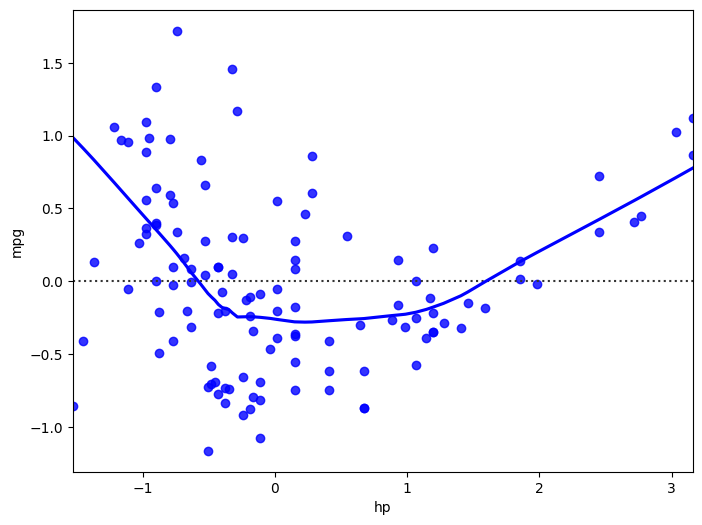

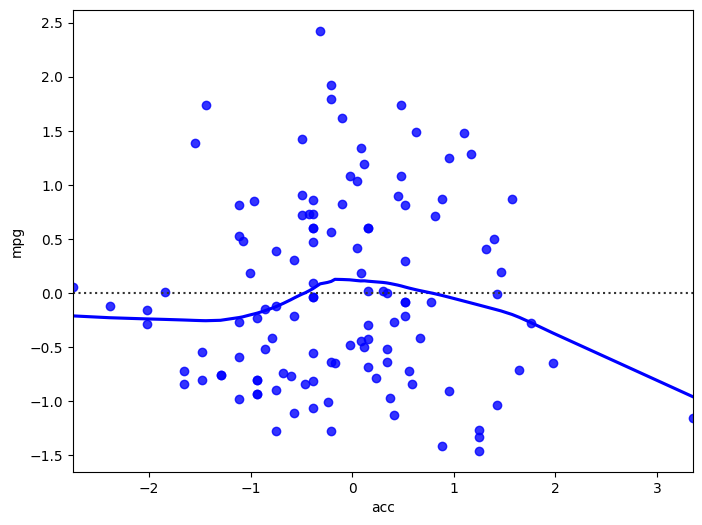

In [36]:
#Residual plot to check viability of OLS

fig  = plt.figure(figsize=(8,6))
sns.residplot(x = x_test["hp"], y = y_test["mpg"], color = "blue", lowess = True)

fig  = plt.figure(figsize=(8,6))
sns.residplot(x = x_test["acc"], y = y_test["mpg"], color = "blue", lowess = True)

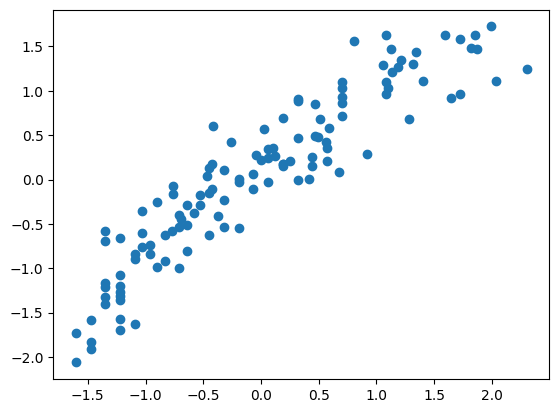

In [37]:
y_pred = model.predict(x_test)
plt.scatter(y_test["mpg"], y_pred)